### RANDOM SAMPLE IMPUTATION

The main aim of the random sample imputation consists of taking random observtion from the dataset and we
use this observtion to replace NAN values

#### When Should it be used?

It assumes that the data are missing completely at random(MCAR)

In [233]:
import pandas as pd
df = pd.read_csv('D:\\Feature Engineering\\Datasets\\Titanic Datasets\\train.csv',usecols = ['Age','Fare','Survived'])

In [234]:
# Checking Null values

df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [235]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [236]:
# Checking Precentage of null values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [237]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [238]:
# Dropna refers to delete all null values
# Sample  is used to pick some random sample from the given feature values
# its only return one value,we need to access all the values for every feature value
df['Age'].dropna().sample(random_state=0)

423    28.0
Name: Age, dtype: float64

In [239]:
df['Age'].isnull().sum()

177

In [240]:
# To access all the sample random values in the feature
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=23)

# (df['Age'].isnull().sum(),random_state=23) passing 177 samples like sample(177)

197    42.0
714    52.0
83     28.0
33     66.0
191    19.0
       ... 
873    47.0
724    27.0
646    19.0
114    17.0
736    48.0
Name: Age, Length: 177, dtype: float64

In [241]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [242]:
# Create the function 

def impute_random_nan(df,variable):
    df[variable+'_random'] = df[variable]
    
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=23)
    # Pandas need to have some index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    # df['Age'].index
    # df[False,False,False.....].index looks like
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample

In [243]:
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=23)
random_sample.count()

177

In [244]:
# Calling the function
impute_random_nan(df,'Age')

In [245]:
df.head(30)

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,42.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [246]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_random      0
dtype: int64

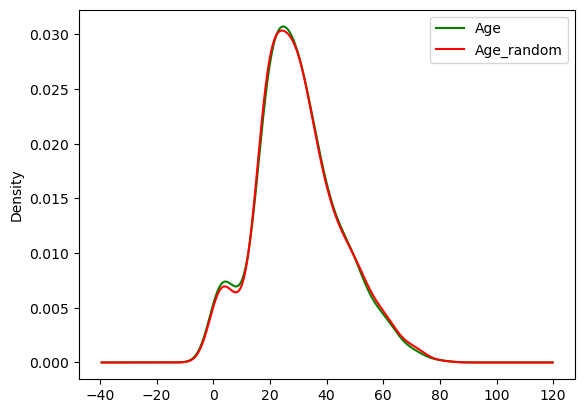

In [247]:
# Visualize both features Age and Age_Random
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = "kde",ax = ax,color = "green")
df['Age_random'].plot(kind = "kde",ax = ax,color = "red")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

#### Advantages
1. Easy to implement
2. There is less distortion in varience

#### Disadvantage
1.Every situation randomness won't work

## Capturing NAN values with a new feature

It works well if the data are not missing completely at random (MNAR)

In [248]:
import pandas as pd
df = pd.read_csv('D:\\Feature Engineering\\Datasets\\Titanic Datasets\\train.csv',usecols = ['Age','Fare','Survived'])

In [249]:
# Check the values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [250]:
# Creating new feature and replace 1 and 0 for capturing the Null values
import numpy as np
df['NewAge_NanFill'] = np.where(df['Age'].isnull(),1,0)

In [251]:
df.head(10)

,Survived,Age,Fare,NewAge_NanFill
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [252]:
# Calculate Median or Mean or any calculation for passing the value in the feature 
age_median = df['Age'].median()

In [253]:
# the below two techniques is used to fill nan values in the feature

df['Age'].fillna(age_median,inplace = True)

##df['Age'] = np.where(df['Age'].isnull(),age_median,df['Age'])

In [254]:
df.head(10)

,Survived,Age,Fare,NewAge_NanFill
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages
1.Easy to implement<br>
2.Captures the importance of missing values in the dataset feature

### Disadvantage
1.Creating Additional feature.Suppose more features are present it may be leads to curse of dimensionality.

## End of Distribution Imputation

it is used in Missing at Random (MAR)

In [255]:
import pandas as pd
df = pd.read_csv('D:\\Feature Engineering\\Datasets\\Titanic Datasets\\train.csv',usecols = ['Age','Fare','Survived'])

In [256]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

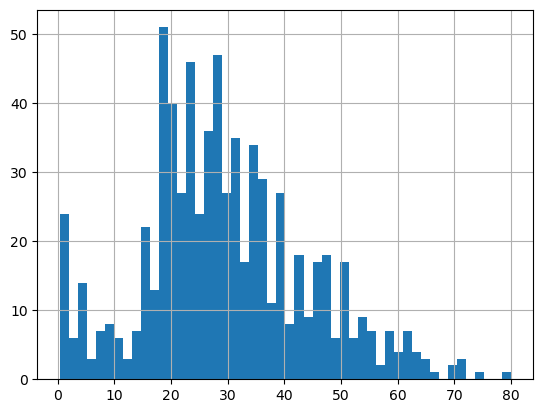

In [257]:
# Plot the feature
df['Age'].hist(bins=50)

In [258]:
df.Age.mean()

29.69911764705882

In [259]:
# This is end of distribution it means that we have to pickup after three standard deviation right in normal distribution
# So getting the after 3sd using formula
# it is simple

extreme = df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

<Axes: xlabel='Age'>

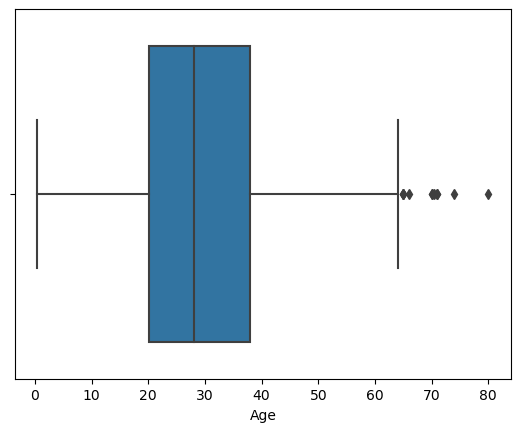

In [260]:
# Then use boxplot to check the distribution in the form of box plot

import seaborn as sns 
sns.boxplot(x='Age',data=df)

Some outliers are present

In [261]:
# Then create the impute function
def impute_end_dist(df,variable,extreme,median):
    df[variable+"_extreme"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [262]:
# Calling the function
impute_end_dist(df,'Age',extreme,df['Age'].median())

Age


In [263]:
df.head(20)

,Survived,Age,Fare,Age_extreme
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<Axes: >

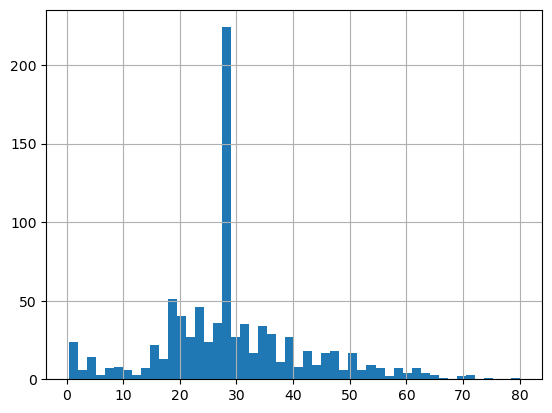

In [264]:
# Checking Age feature
df['Age'].hist(bins=50)

the centre long bar denotes the NULL value with fillna median values is assigned

<Axes: >

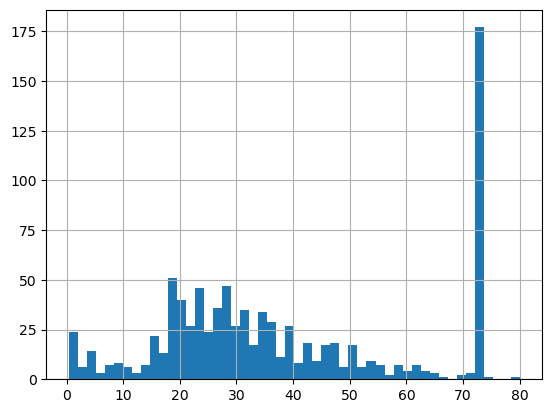

In [268]:
# Checking the feature Age_Extreme
df['Age_extreme'].hist(bins=50)

<Axes: xlabel='Age_extreme'>

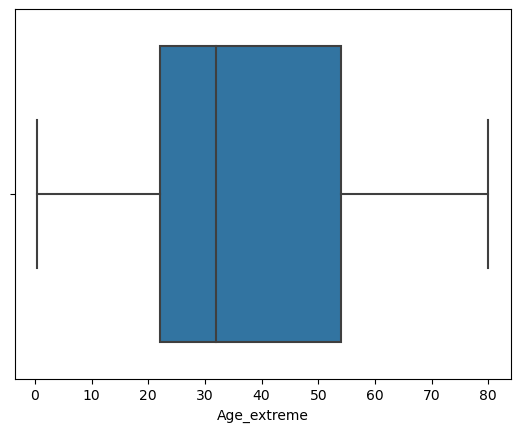

In [269]:
sns.boxplot(x='Age_extreme',data=df)

### Advantages

1.Easy to implement
2.Capture the importance of missingness if there is one.

### Disadvantages

1.Distorts the original distribution of variables<br>
2.If Missingness is not important,it may mask the predictive power of the original value by distorting its distribution<br>
3.If the number is NA is big,it will mask true outliers in the distribution<br>
4.If the number of NA is small,the replaced NA may be considered an outlier and pre-processed in a subsquent store feature engineering